In [5]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt

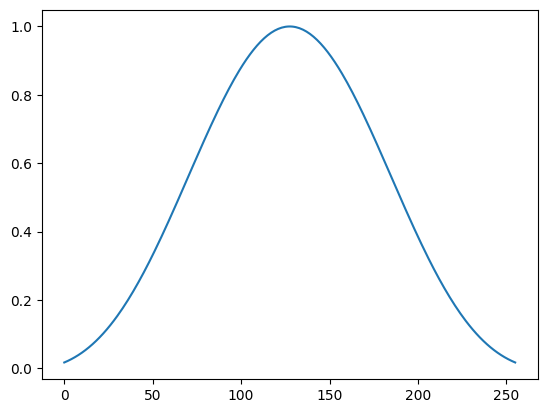

In [6]:
window_length = 256
window = signal.windows.dpss(window_length, 2)
window /= np.max(window)

plt.plot(window)

In [7]:
def to_int16(x):
    x /= np.max(np.abs(x))
    x = np.round(x * 32767).astype(int)
    return x

In [8]:
rounded_window = to_int16(window)
print(f"static int32_t window[{window_length}] = {{")

for i in range(0, window_length, 16):
    line = ", ".join(f"0x{rounded_window[i+j]:04x}" for j in range(16) if i+j < window_length)
    print(f"    {line},")

print("};\n")


static int32_t window[256] = {
    0x022b, 0x0274, 0x02c1, 0x0314, 0x036a, 0x03c6, 0x0426, 0x048b, 0x04f5, 0x0564, 0x05d9, 0x0653, 0x06d2, 0x0756, 0x07e0, 0x0870,
    0x0905, 0x09a0, 0x0a40, 0x0ae7, 0x0b93, 0x0c46, 0x0cfe, 0x0dbc, 0x0e80, 0x0f4a, 0x101b, 0x10f1, 0x11cd, 0x12b0, 0x1398, 0x1487,
    0x157b, 0x1676, 0x1776, 0x187c, 0x1988, 0x1a9a, 0x1bb2, 0x1ccf, 0x1df2, 0x1f1a, 0x2048, 0x217b, 0x22b3, 0x23f0, 0x2533, 0x267a,
    0x27c5, 0x2916, 0x2a6b, 0x2bc4, 0x2d21, 0x2e82, 0x2fe7, 0x314f, 0x32bb, 0x342a, 0x359d, 0x3712, 0x3889, 0x3a03, 0x3b7f, 0x3cfe,
    0x3e7e, 0x3fff, 0x4182, 0x4305, 0x448a, 0x460f, 0x4794, 0x491a, 0x4a9f, 0x4c24, 0x4da8, 0x4f2b, 0x50ac, 0x522d, 0x53ab, 0x5527,
    0x56a1, 0x5818, 0x598d, 0x5afe, 0x5c6c, 0x5dd6, 0x5f3c, 0x609e, 0x61fb, 0x6354, 0x64a7, 0x65f5, 0x673e, 0x6881, 0x69be, 0x6af4,
    0x6c24, 0x6d4d, 0x6e6f, 0x6f89, 0x709d, 0x71a8, 0x72ac, 0x73a7, 0x749a, 0x7584, 0x7666, 0x773f, 0x780f, 0x78d5, 0x7992, 0x7a45,
    0x7aef, 0x7b8e, 0x7c24, 0x7caf, 0x7d31, 0